# He initialization with relu function

__relu에서의 Xavier 초기화__

Relu에서 xavier를 사용하였을때, 생기는 문제점을 알아보고자함.

Relu는 가장 대표적인 활성화 함수로, sigmoid와 달리 비대칭적인 형태를 가짐.


In [0]:
%matplotlib inline
import tensorflow as tf
import math
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
import pandas as pd

In [0]:
def relu(x):
    return np.maximum(x,0)

num_data = 2000
unit_num = 512
num_layer = 20

X = np.random.randn(num_data, unit_num) 

history = []
a = X
for i in range(num_layer):
    W = np.random.normal(scale=np.sqrt(1/unit_num),
                         size=(unit_num,unit_num))
    z = np.dot(a,W)
    a = relu(z)
    history.append(a.copy())
    

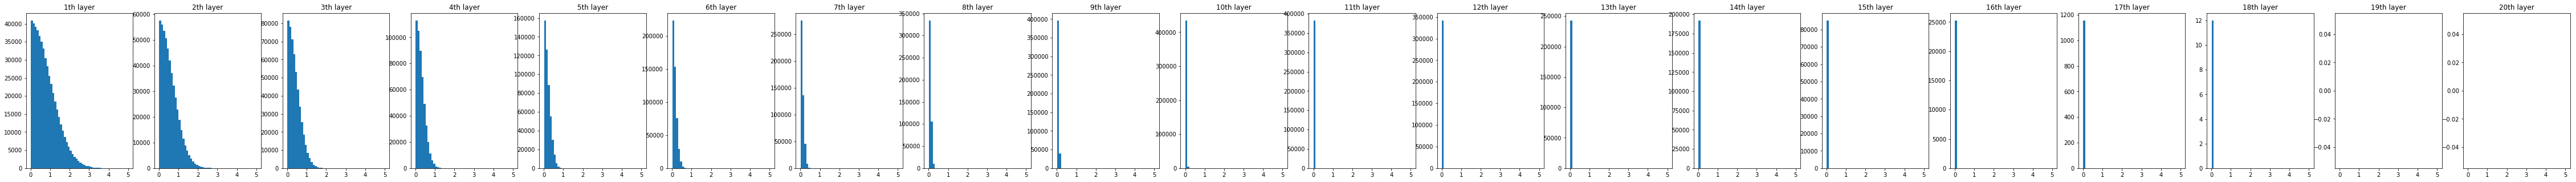

In [4]:
plt.figure(figsize=(80,5))
for idx, value in enumerate(history):
    plt.subplot(1, num_layer, idx+1)
    plt.title("{}th layer".format(idx+1))
    plt.hist(value.flatten(),50,range=(0.01,5))
plt.show()

활성화 함수로 relu 함수를 이용할 경우, Xavier로 하더라도 값의 분포가 계속 줄어드는 것을 확인.<br>
이는 relu의 형태에 기인한 문제로 생각됨

### (4) He 초기화

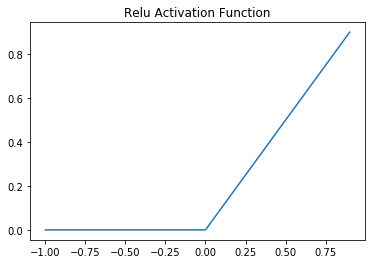

In [5]:
xs = np.arange(-1,1,0.1)
ys = relu(xs)

plt.title("Relu Activation Function")
plt.plot(xs,ys)
plt.show()

Relu는 강제적으로 입력 값이 0이하의 값들을 0으로 바꾸어버리기 때문에 <br>
이렇기 때문에 값의 분산이 줄어드는 효과가 발생한다.<br>

이를 보정하기 위해서 Xavier의 가중치 값의 분포에 2배를 곱하는 식으로 초기화를 해주면 해결됨.<br>
$$
var(w) = \frac{2}{n}
$$
위의 수식을 허(He) 초기화라고 칭한다.

In [0]:
def relu(x):
    return np.maximum(x,0)

In [0]:
num_data = 2000
unit_num = 512
num_layer = 20

X = np.random.randn(num_data, unit_num) 

history = []
a = X
for i in range(num_layer):
    W = np.random.normal(scale=np.sqrt(2/unit_num),
                         size=(unit_num,unit_num))
    z = np.dot(a,W)
    a = relu(z)
    history.append(a.copy())
    

__He초기화로 인해 layer가 깊어져도 값의 분포가 크게 변하지 않음을 확인__

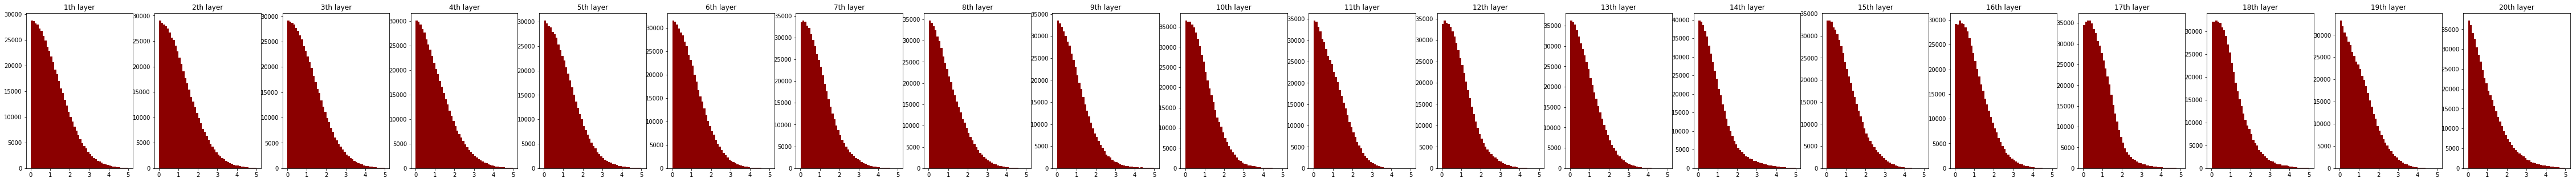

In [9]:
plt.figure(figsize=(80,5))
for idx, value in enumerate(history):
    plt.subplot(1, num_layer, idx+1)
    plt.title("{}th layer".format(idx+1))
    plt.hist(value.flatten(),50,range=(0.01,5), color='darkred')
plt.show()